# <center>EDA</center>

**Aim of the notebook to gain insight of the features of the data which can be further used during model training**

<pre>
<b><u>Data Variables</u></b>                                                          <b><u>Type(Measurement)</u></b>
Industry Energy Consumption                                              Continuous(kWh)
Lagging Current reactive power                                          Continuous(kVarh)
Leading Current reactive power                                          Continuous(kVarh)
tCO2(CO2)                                                                Continuous(ppm)
Lagging Current power factor                                              Continuous(%)
Leading Current Power factor                                              Continuous(%)
Number of Seconds from midnight                                           Continuous(S)
Week status                                                      Categorical(Weekend (0) or a Weekday(1))
Day of week                                                   Categorical Sunday, Monday... Saturday
Load Type                                                 Categorical Light Load, Medium Load, Maximum Load
day                                                                       Categorical
month                                                                     Categorical
year                                                                      Categorical
hour                                                                      Categorical
minute                                                                    Categorical
</pre>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [32]:
## Load dataset
df = pd.read_csv('Steel_Feature_Engineering.csv')

In [33]:
## column names
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'day', 'month', 'year',
       'hour', 'minute'],
      dtype='object')

In [46]:
numeric = ['Usage_kWh','Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 
           'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']
categorical = ['WeekStatus', 'Day_of_week', 'Load_Type']
temporal = ['day', 'month', 'year', 'hour', 'minute']

In [47]:
print("Numeric Features: ",numeric)

Numeric Features:  ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']


In [48]:
print("Categorical Features: ", categorical)

Categorical Features:  ['WeekStatus', 'Day_of_week', 'Load_Type']


In [37]:
print("Temporal/Datetime variable: ", temporal)

Temporal/Datetime variable:  ['day', 'month', 'year', 'hour', 'minute']


**1. All of the numrical features are categorical**

In [38]:
# Sahpe of the data
print("Shape of the dataset: ",df.shape)

Shape of the dataset:  (35040, 15)


In [39]:
## Missing Values
print("Missing Values\n", df.isnull().sum())

Missing Values
 Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
day                                     0
month                                   0
year                                    0
hour                                    0
minute                                  0
dtype: int64


**2. No feature has missing values.**

In [40]:
for feature in temporal:
    print(feature, ": ")
    print(df[feature].unique())

day : 
[ 1 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31  2  3  4  5
  6  7  8  9 10 11 12]
month : 
[ 1  2  3  4  5  6  7  8  9 10 11 12]
year : 
[2018]
hour : 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
minute : 
[15 30 45  0]


**2. All the data is recorded in 2018 so it doesn't have any specific significance.**<br>
**3. Data is recorded after each 15 minutes**

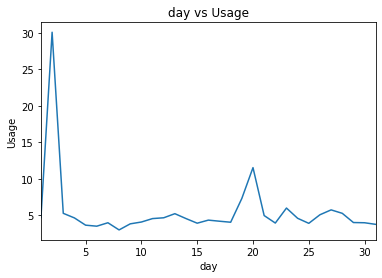

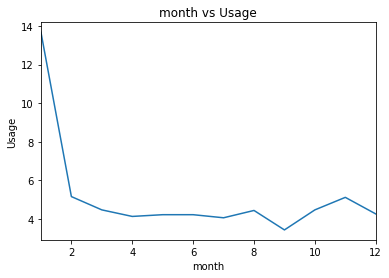

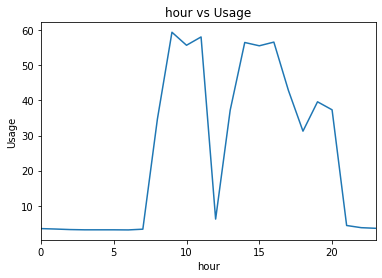

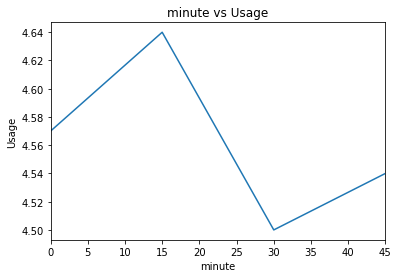

In [41]:
for feature in temporal:
    if feature == 'year':
        continue
    data = df.copy()
    data.groupby(feature)['Usage_kWh'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Usage')
    plt.title(str(feature) + " vs Usage")
    plt.show()

**4. Company starts work from 8 a.m. and completes at 8 p.m. and at 12 p.m. tiffin break is given.**<br>
**5. Rest of the temporal variables have no specific distribution.**

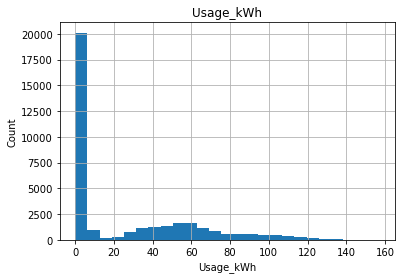

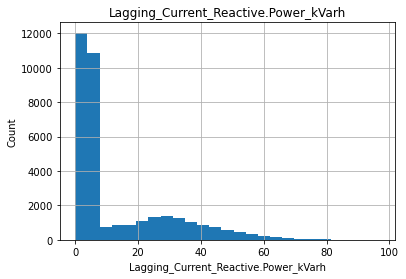

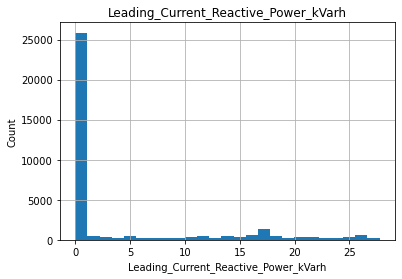

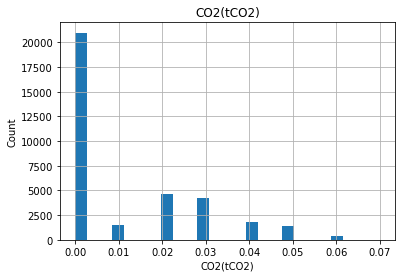

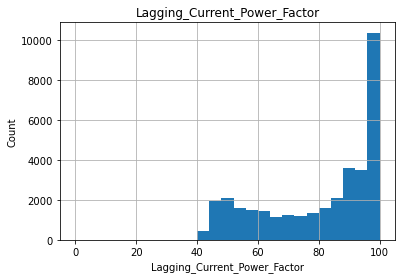

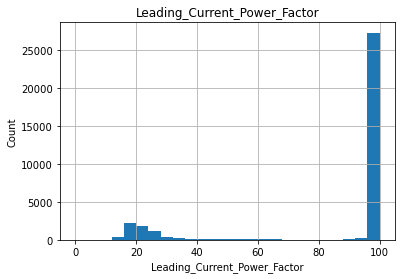

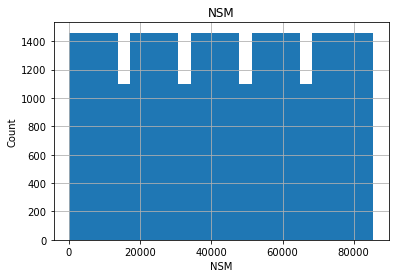

In [49]:
# Distribution of continuous variables
for feature in numeric:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**6. All of the continuous variables are highly skewed.**

In [56]:
## Feature with zero
numeric_with_zero = [feature for feature in numeric if 0 in df[feature].unique()]
print("Numerical variables with zero: ", numeric_with_zero)

Numerical variables with zero:  ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']


**7. All of the numeric features conssists zero therefore log tranformation can't be applied directly on these features.**

In [57]:
## To understand more about the numeric features
df[numeric].describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


**8. Range of all the numeric data is large therefore it's evident that each of the feature may consist outlier**

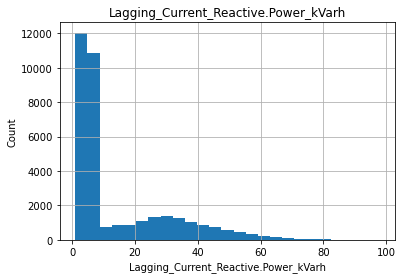

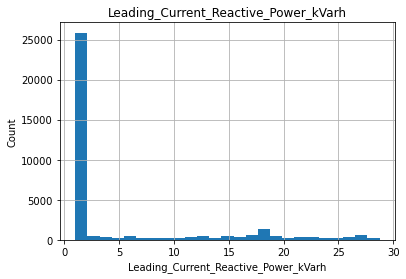

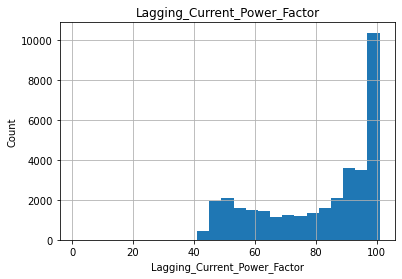

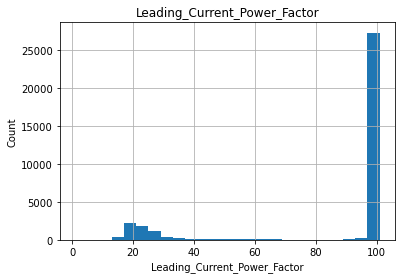

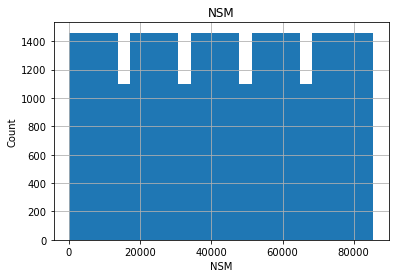

In [60]:
## Log Transformation
for feature in numeric:
    data=df.copy()
    if 0 in data[feature].unique() and feature != 'CO2(tCO2)':
        df[feature]+=1
    elif feature == 'CO2(tCO2)' or feature == 'Usage_kWh':
        continue
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**9. Log Transformation can't improve the distribution of the data.**

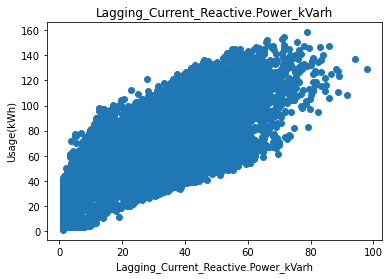

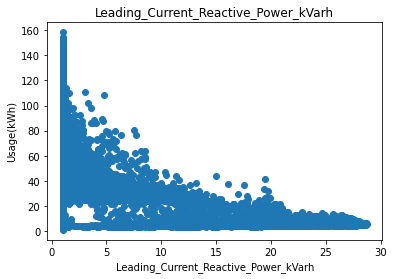

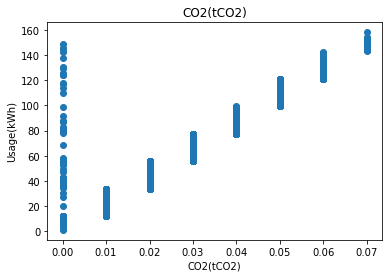

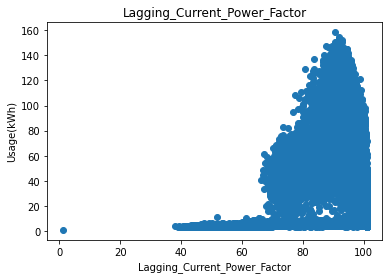

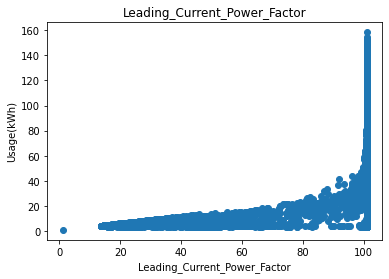

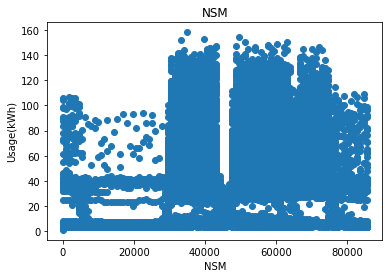

In [65]:
for feature in numeric:
    if feature == 'Usage_kWh':
        continue
    data=df.copy()
    plt.scatter(data[feature],data['Usage_kWh'])
    plt.xlabel(feature)
    plt.ylabel('Usage(kWh)')
    plt.title(feature)
    plt.show()

**10. Lagging_Current_Reactive.Power_kVarh and CO2(tCO2) has some linear relationship with Usage_kWh**<br>
**11. Leading_Current_Reactive_Power_kVarh and Leading_Current_Power_Factor has also some non-linear relationship with Usage_kWh.**

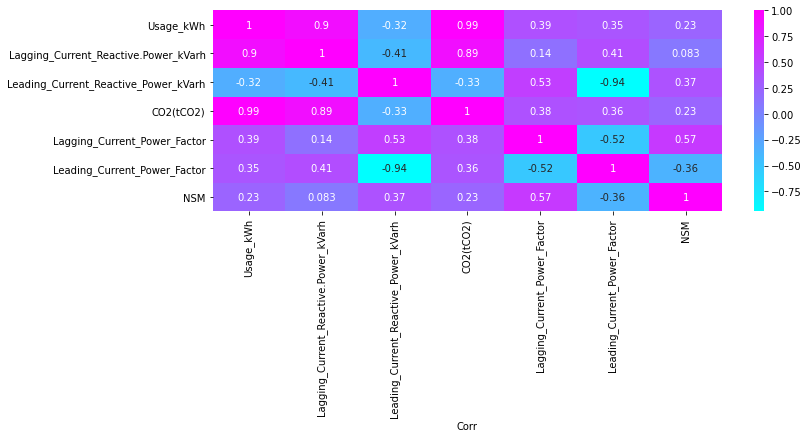

In [68]:
# Correlation
figure = plt.figure(figsize=(12, 6))
sns.heatmap(df[numeric].corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

**12. Usage_kWh has high correlation with Lagging_Current_Reactive.Power_kVarh and CO2(tCO2).**<br>
**13. Lagging_Current_Reactive.Power_kVarh also has high correlation with CO2(tCO2)**<br>
**14. Leading_Current_Reactive_Power_kVarh has high correlation with Leading_Current_Power_Factor**<br>
**15. Target variables has some correlation with all of the numeric variables.**<br>
**16. Beside that, independent variables also has high correlation among them**

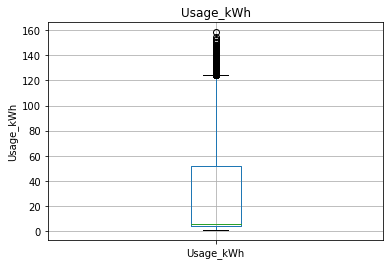

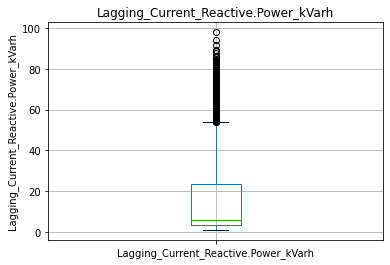

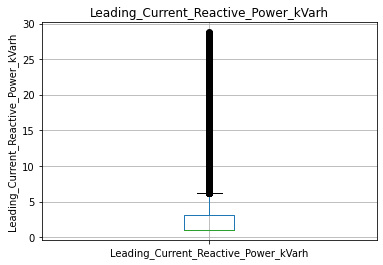

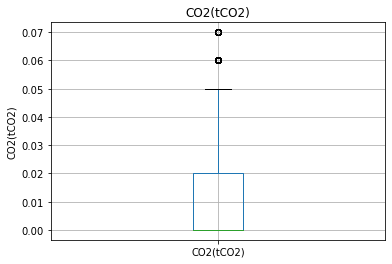

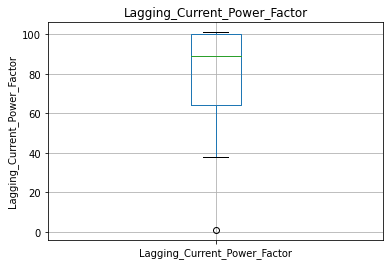

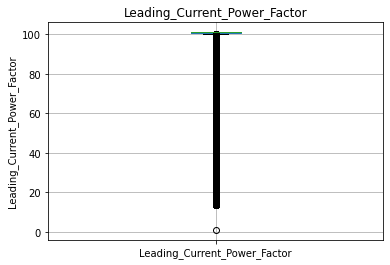

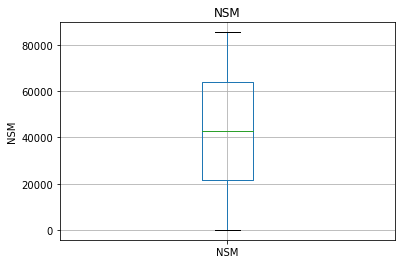

In [71]:
# Outlier Checking
for feature in numeric:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()  

**17. All the continuous features have a lot of outliers so removing all the outliers from the dataset will reduce the dataset extensively.**<br>
**18. Also considering these huge amount of datapoints as outliers isn't a good choice.**

In [72]:
# Unique Values of Categorical variables
for feature in categorical:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is WeekStatus and number of categories are 2
The feature is Day_of_week and number of categories are 7
The feature is Load_Type and number of categories are 3


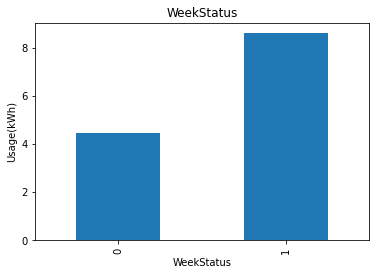

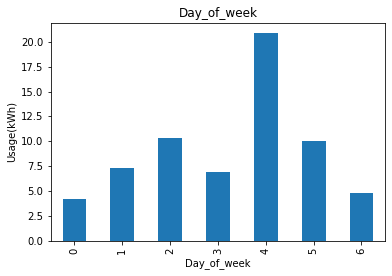

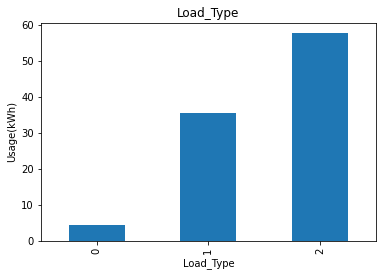

In [74]:
## Find out the relationship between categorical variable and dependent feature SalesPrice
for feature in categorical:
    data=df.copy()
    data.groupby(feature)['Usage_kWh'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Usage(kWh)')
    plt.title(feature)
    plt.show()

**19. Energy usage is much higher in weekdays that weekend especially at the mid of the week.**<br>
**20. It is also found that usage of energy is directly propotional with Load_Type.** 